# Классификация
## Набор бриллиантов с параметрами

In [24]:
import sklearn
import sklearn.model_selection as ms
import sklearn.neighbors as nbs
import pandas
import matplotlib.pyplot as pyp
import sklearn.svm as svm

def genDict(array,param):
    return {array.get(param).unique()[i]:i
               for i in range(len(array.get(param).unique()))}


datadaimonds = pandas.read_csv("diamonds.csv",delimiter=',', index_col='Unnamed: 0')
X = datadaimonds['cut']
clarityDict = genDict(datadaimonds,'clarity')
colorDict = genDict(datadaimonds,'color')
cutDict = genDict(datadaimonds,'cut')
datadaimonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Определение способа обработки камня в зависимости от его прочих параметров
    Классификация методом к-ближайших соседей

In [25]:
X = []
y = []
for x in datadaimonds.values:
    X.append([x[0],colorDict[x[2]],clarityDict[x[3]],
              x[4],x[5],x[6],x[7],x[8],x[9]])
    y.append(cutDict[x[1]])
X_train, X_test, y_train, y_test = ms.train_test_split(
    X, y, random_state = 12)
nb = nbs.KNeighborsClassifier()
nb.fit(X_train,y_train)
result = nb.predict(X_test)
sklearn.metrics.accuracy_score( result, y_test )

0.5260659992584353

    Оценка с использованием кросс-валидации

In [26]:
ms.cross_val_score(nb,X,y,cv=5)

array([0.1412288 , 0.01965146, 0.03355891, 0.21368314, 0.17168814])

    Изменение числа ближайших соседей от 1 до 20. Подсчёт методом вычисления среднего результата кросс-валидации. 

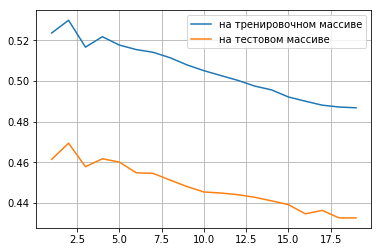

In [27]:
train = []
test = []
for i in range(1, 20,1):
    clf = nbs.KNeighborsClassifier(n_neighbors=i)
    train.append(ms.cross_val_score(clf,X_train,y_train,cv=10).mean())
    test.append(ms.cross_val_score(clf,X_test, y_test, cv=10).mean())

pyp.plot(range(1, 20,1), train, label="на тренировочном массиве")
pyp.plot(range(1, 20,1), test, label='на тестовом массиве')
pyp.legend()
pyp.grid()
pyp.show()

## Данные о смерти героев вселенной Игры Престолов

In [28]:
datadead = pandas.read_csv("character-deaths.csv",delimiter=',')
datadead = datadead.fillna(0)
housesDict = genDict(datadead,'Allegiances')
datadead.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,0.0,0.0,0.0,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,0.0,0.0,0.0,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,0.0,0.0,0.0,0.0,1,1,0,0,1,0,0


### Определить, доживёт ли герой до четвёртой книги
Если герой умер до начала повествования, то считается, что он умер раньше.

In [29]:
X = []
y = []
for x in datadead.values:
    a = list(x[5:])
    a.append(housesDict[x[1]])
    X.append(a)
    y.append(x[3] <= 3)

clf = svm.LinearSVC(random_state=12)
X_train, X_test, y_train, y_test = ms.train_test_split(
    X, y, random_state = 200)
clf.fit(X_train,y_train)
predicted = clf.predict(X_test)
print("accuracy = {0} precision = {1} recall = {2} f-measure = {3}".format(
    sklearn.metrics.accuracy_score(y_test,predicted),
    sklearn.metrics.precision_score(y_test,predicted),
    sklearn.metrics.recall_score(y_test,predicted),
    sklearn.metrics.f1_score(y_test,predicted)
))

accuracy = 0.9304347826086956 precision = 0.9304347826086956 recall = 1.0 f-measure = 0.9639639639639639


In [30]:
print(sklearn.metrics.classification_report(
    y_test,predicted,target_names=['still alive',"is dead before 4 book"]))

                       precision    recall  f1-score   support

          still alive       0.00      0.00      0.00        16
is dead before 4 book       0.93      1.00      0.96       214

          avg / total       0.87      0.93      0.90       230



C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
